In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.io import wavfile # package to read WAV file
import pandas as pd
sns.set_style("white")
sns.set_style("ticks")
import warnings
warnings.filterwarnings("ignore")
import latexify as lt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


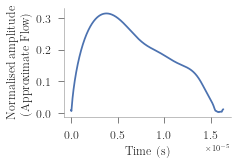

In [11]:
#generating more figures for the paper
lt.latexify(columns=1, fig_height=2, fig_width=3)
figname = "pipeline-figure/pipeline-6"
mypath="clothData/"
file = "012_FVC_Cloth_1.json"
x = pd.read_json(mypath+file, orient='keys')['payload']['values']
fs=16000
x = x/np.max(np.abs(x))
fvcStartIndex = np.where(x>=0.50)
x = x[fvcStartIndex[0][0]-5000:]
t = np.arange(0,len(x))/fs


axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)

ax = plt.subplot(1,1,1)
ax.plot(estdVolume,envelope_hat_filt)
#ax.plot(estdVolume,envelope_hat_filt)
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Normalised amplitude\n (Approximate Flow)', fontsize=12)

ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

lt.format_axes(ax)
plt.savefig(figname+'.pdf', bbox_inches='tight')

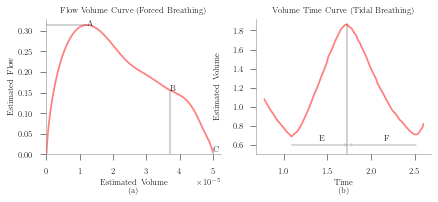

In [135]:
# temp code for generating a key image for the paper.

lt.latexify(columns=2, fig_height=2.5)
figname = "fb-tb-main"
mypath="clothData/"
file = "012_FVC_Cloth_1.json"
fs = 16000
#fig, ax = plt.subplots(nrows=1, ncols=1)
x = pd.read_json(mypath+file, orient='keys')['payload']['values']
x = x/np.max(np.abs(x))
fvcStartIndex = np.where(x>=0.50)
x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
t = np.arange(0,len(x))/fs
axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)




ax = plt.subplot(1,2,1)
ax.plot(estdVolume, envelope_hat_filt, color='red', alpha=0.5)
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.set_xlabel('Estimated Volume\n (a)')
ax.set_ylabel('Estimated Flow')
ax.set_title('Flow Volume Curve (Forced Breathing)')
PEFannotateX = estdVolume[np.where(envelope_hat_filt == np.max(envelope_hat_filt))[0][0]]
PEFannotateY = np.max(envelope_hat_filt)
ax.annotate('A', xy =(PEFannotateX, PEFannotateY), xytext =(PEFannotateX, PEFannotateY))
ax.hlines(PEFannotateY, 0, PEFannotateX, colors='k', linestyles='solid', label='', alpha=0.2)
FEVannotateX = estdVolume[16000]
FEVannotateY = envelope_hat_filt[16000]
ax.annotate('B', xy =(FEVannotateX, FEVannotateY), xytext =(FEVannotateX, FEVannotateY))
ax.vlines(FEVannotateX, 0, FEVannotateY, colors='k', linestyles='solid', alpha=0.2)
FVCannotateX = estdVolume[-1]
FVCannotateY = envelope_hat_filt[-1]
ax.annotate('C', xy =(FVCannotateX, FVCannotateY), xytext =(FVCannotateX, FVCannotateY))
ax.vlines(FVCannotateX, 0, FVCannotateY, colors='k', linestyles='solid', alpha=0.2)
  
lt.format_axes(ax)

ax = plt.subplot(1,2,2)
x2 = pd.read_csv('sample-tidal.csv')
ax.plot(x2['X'], x2['Y'],color='red',alpha=0.5)
ax.set_ylim(0.5,)
ax.set_ylabel('Estimated Volume\n')
ax.set_xlabel('Time\n (b)')
ax.set_title('Volume Time Curve (Tidal Breathing)')



ax.arrow(1.08782718105938, 0.6, 0.60476226762, 0, width=0.01, color='k', linestyle='solid', alpha=0.2) 
ax.vlines(1.7225894486877298, 0, 1.86549823672225, colors='k', linestyles='solid', alpha=0.2)
ax.annotate('E', xy =(1.40520831487,0.65), xytext =(1.40520831487, 0.65))

ax.arrow(2.5151783657339304, 0.6, -0.73258891704, 0, width=0.01, color='k', linestyle='solid', alpha=0.2) 
ax.annotate('F', xy =(2.15,0.65), xytext =(2.15, 0.65))



lt.format_axes(ax)
plt.savefig(figname+'.pdf', bbox_inches='tight')

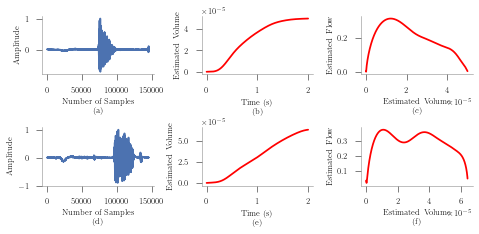

In [10]:
# temp code for generating a key image for the paper.
figname = "flowVSvolume"
lt.latexify(columns=2, fig_height=3)
fs = 16000
mypath="clothData/"
file = "012_FVC_Cloth_1.json"
#print("Reading:", file)
fig, ax = plt.subplots(2,3)

x = pd.read_json(mypath+file, orient='keys')['payload']['values']
x = x/np.max(np.abs(x))
ax[0,0].plot(x)
ax[0,0].set_ylabel('Amplitude')
ax[0,0].set_xlabel('Number of Samples\n (a)')

lt.format_axes(ax[0,0])

#detect the starting point of FVC
fvcStartIndex = np.where(x>=0.50)
#move back x second from the point FVC started and go till y seconds
x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
#print("SNR=", x.mean()/x.std())
t = np.arange(0,len(x))/fs

# get analytic signal
axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
#Corresponds to PEF
#rPEF.append(100000*envelope_hat_filt_normalized.max())
#print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)
#FEV1 Estimate
#rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
#print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
ax[0,1].plot(t,estdVolume, color='red')
ax[0,1].set_ylabel('Estimated Volume')
ax[0,1].set_xlabel('Time (s)\n (b)')
lt.format_axes(ax[0,1])


ax[0,2].plot(estdVolume, envelope_hat_filt, color='red')
ax[0,2].set_xlabel('Estimated Volume\n (c)')
ax[0,2].set_ylabel('Estimated Flow')
lt.format_axes(ax[0,2])
fig.tight_layout()

######################################################################
######################################################################
######################################################################
######################################################################

file = "012_FVC_Cloth_2.json"
x = pd.read_json(mypath+file, orient='keys')['payload']['values']
x = x/np.max(np.abs(x))
ax[1,0].plot(x)
ax[1,0].set_ylabel('Amplitude')
ax[1,0].set_xlabel('Number of Samples\n (d)')

lt.format_axes(ax[1,0])

#detect the starting point of FVC
fvcStartIndex = np.where(x>=0.50)
#move back x second from the point FVC started and go till y seconds
x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
#print("SNR=", x.mean()/x.std())
t = np.arange(0,len(x))/fs

# get analytic signal
axx = signal.hilbert(x)
envelope_hat = np.abs(axx)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
#Corresponds to PEF
#rPEF.append(100000*envelope_hat_filt_normalized.max())
#print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)
#FEV1 Estimate
#rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
#print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
ax[1,1].plot(t,estdVolume, color='red')
ax[1,1].set_ylabel('Estimated Volume')
ax[1,1].set_xlabel('Time (s)\n (e)')
lt.format_axes(ax[1,1])


ax[1,2].plot(estdVolume, envelope_hat_filt, color='red')
ax[1,2].set_xlabel('Estimated Volume\n (f)')
ax[1,2].set_ylabel('Estimated Flow')
lt.format_axes(ax[1,2])



plt.savefig(figname+'.pdf', bbox_inches='tight')
plt.show()

In [9]:
import os
mypath="clothdata/"
(_, _, filenames) = next(os.walk(mypath))

Reading: 005_FVC_Cloth_1.json
SNR= -0.0020412844916363475
Raw PEF =  4.9454434516913555
Raw FEV1 =  3.3685744982141137
Raw FVC =  5.852625961278938
Ratio% =  57.556633902467944





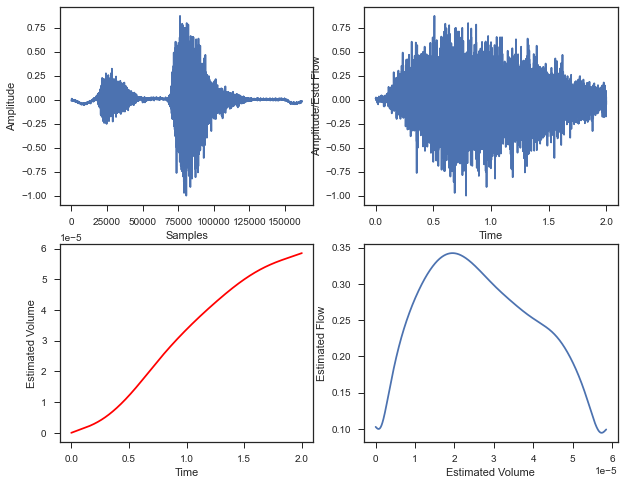

Reading: 005_FVC_Cloth_2.json
SNR= 0.01951941621674532
Raw PEF =  5.399588291886123
Raw FEV1 =  3.5074003563947445
Raw FVC =  5.713083106762835
Ratio% =  61.39242666088431





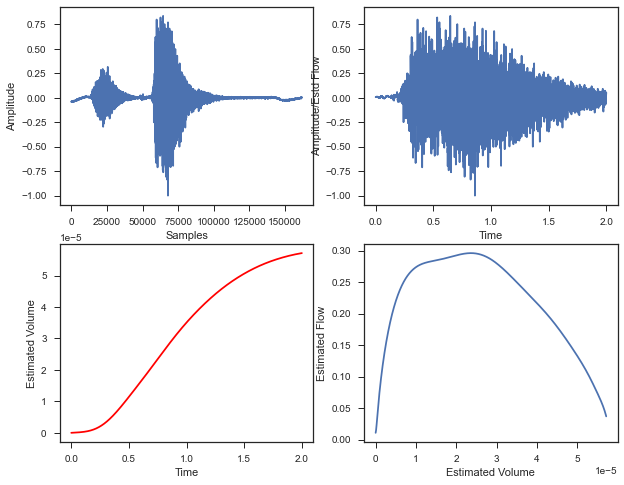

Reading: 006_FVC_Cloth_1.json
SNR= 0.01110066754250194
Raw PEF =  5.673428086937793
Raw FEV1 =  3.5602607397823407
Raw FVC =  5.642441846904502
Ratio% =  63.09787209832803





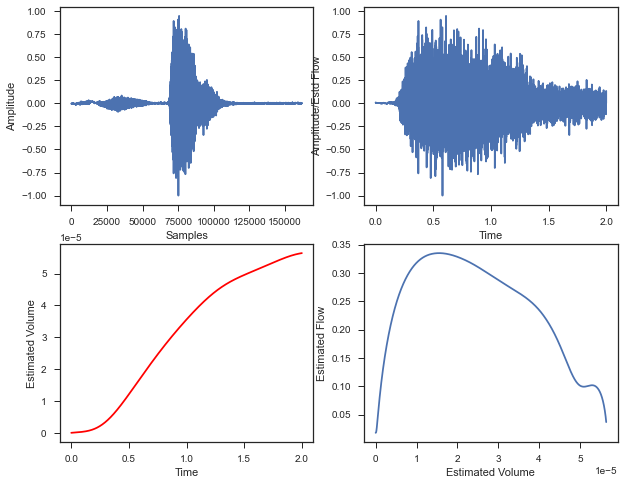

Reading: 006_FVC_Cloth_2.json
SNR= 0.013493927918074921
Raw PEF =  5.784673903178829
Raw FEV1 =  3.431617890080866
Raw FVC =  5.91941134451125
Ratio% =  57.97228289030496





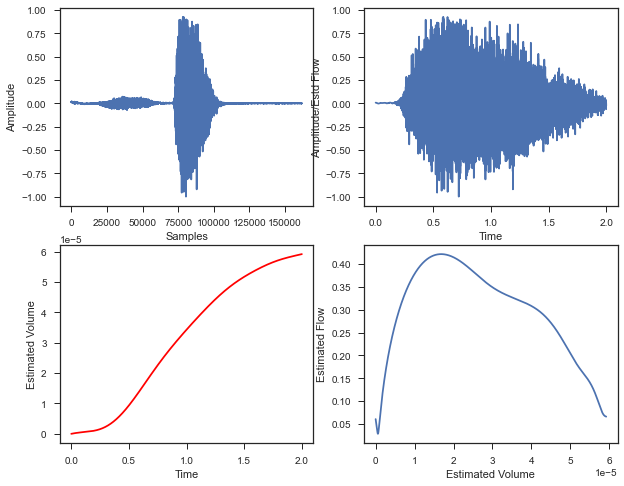

Reading: 008_FVC_Cloth_1.json
SNR= 0.010090878128467182
Raw PEF =  10.861014482526091
Raw FEV1 =  4.087895099267294
Raw FVC =  4.700570634118288
Ratio% =  86.96593280815753





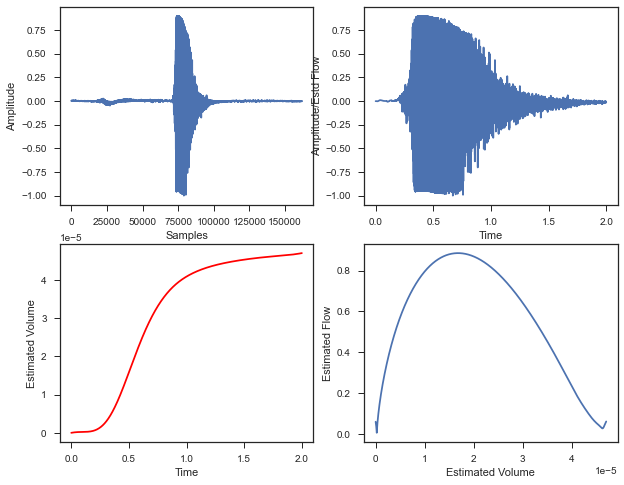

Reading: 008_FVC_Cloth_2.json
SNR= 0.004583250356073128
Raw PEF =  9.39474854765229
Raw FEV1 =  4.1264456174330615
Raw FVC =  5.054230233057843
Ratio% =  81.64340418138282





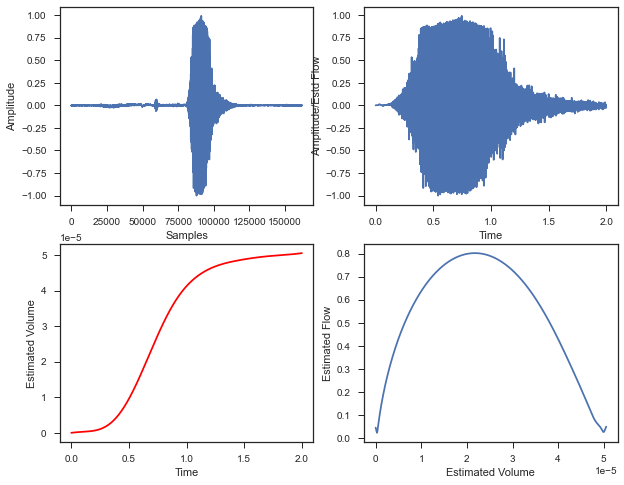

Reading: 009_FVC_Cloth_1.json
SNR= -0.020152930459964795
Raw PEF =  4.515911688981503
Raw FEV1 =  3.204030407928835
Raw FVC =  6.735818104184404
Ratio% =  47.567056567908764





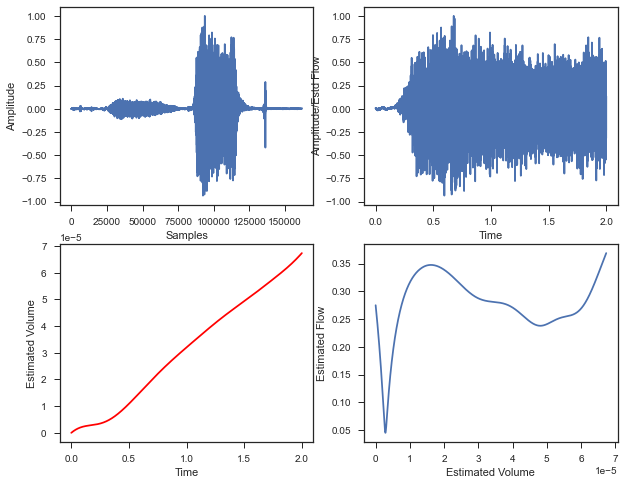

Reading: 009_FVC_Cloth_2.json
SNR= -0.01750339708187953
Raw PEF =  5.503669089525725
Raw FEV1 =  3.5281471068236527
Raw FVC =  5.815289079503852
Ratio% =  60.67019297903358





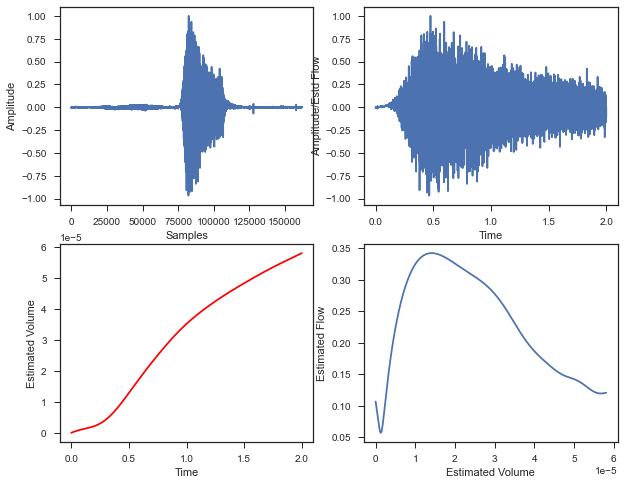

Reading: 010_FVC_Cloth_1.json
SNR= 0.006973043329021981
Raw PEF =  5.831237198858094
Raw FEV1 =  3.443058645744016
Raw FVC =  6.013935163494317
Ratio% =  57.251342958334675





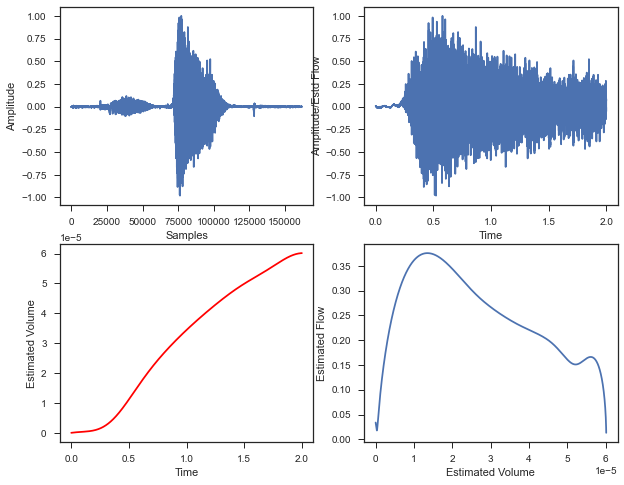

Reading: 010_FVC_Cloth_2.json
SNR= -0.010077921374283923
Raw PEF =  4.576732030714759
Raw FEV1 =  3.1855492155388787
Raw FVC =  6.322292850691991
Ratio% =  50.385980067187376





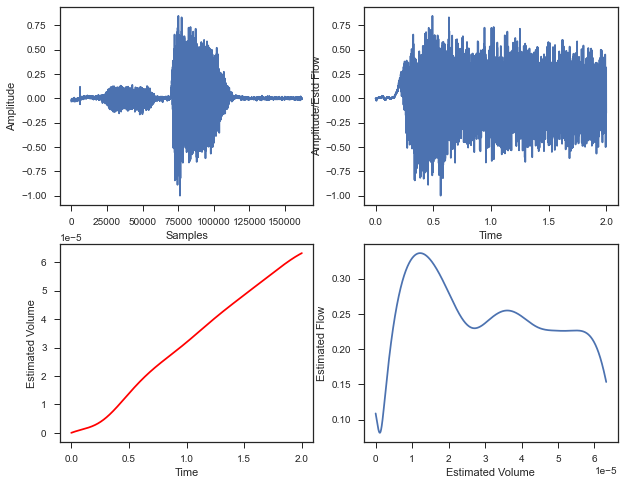

Reading: 012_FVC_Cloth_1.json
SNR= 0.01077441550633266
Raw PEF =  7.878593827228366
Raw FEV1 =  3.713349341380507
Raw FVC =  5.003952731319544
Ratio% =  74.2083217161265





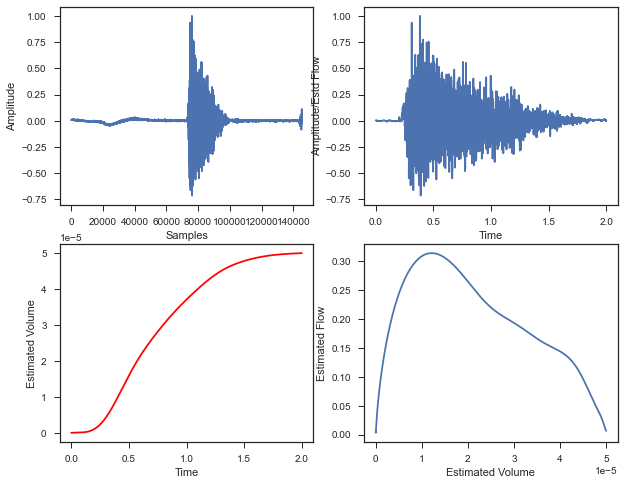

Reading: 012_FVC_Cloth_2.json
SNR= -0.014290548903134784
Raw PEF =  4.606551089783495
Raw FEV1 =  3.0986330677405274
Raw FVC =  6.410711147250072
Ratio% =  48.33524700406619





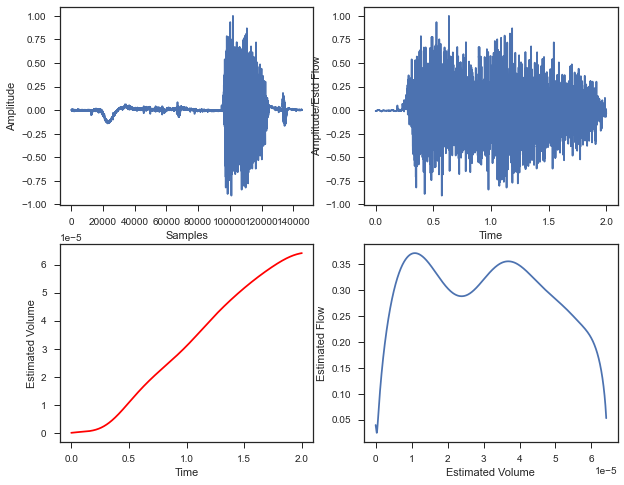

Reading: 013_FVC_Cloth_1.json
SNR= 0.009138902357140606
Raw PEF =  7.893277423497396
Raw FEV1 =  4.192509168664061
Raw FVC =  4.783256450699594
Ratio% =  87.64968409859917





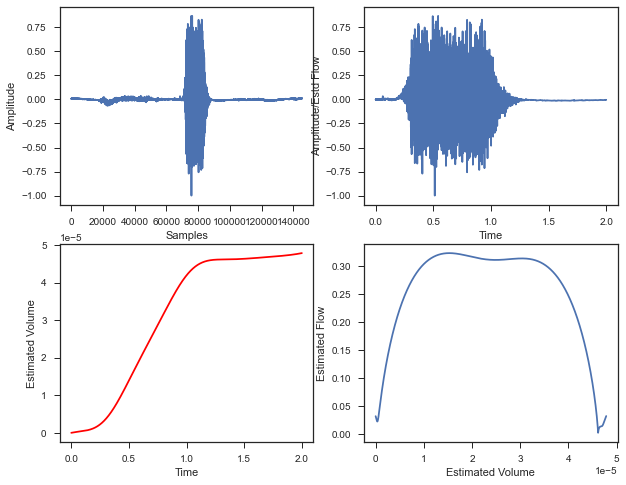

Reading: 013_FVC_Cloth_2.json
SNR= 0.006816737405407768
Raw PEF =  9.278529824969754
Raw FEV1 =  4.192178879511018
Raw FVC =  4.694320109702457
Ratio% =  89.30321711223766





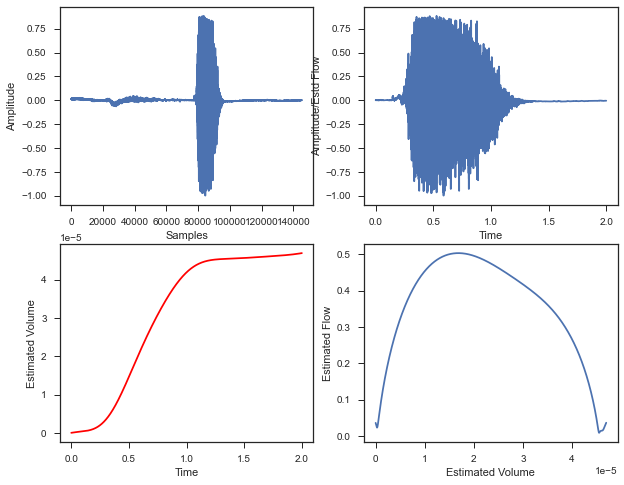

Reading: 014_FVC_Cloth_1.json
SNR= 0.010639011308028653
Raw PEF =  12.337238144694684
Raw FEV1 =  4.075087847839529
Raw FVC =  4.441391387846615
Ratio% =  91.75250483419597





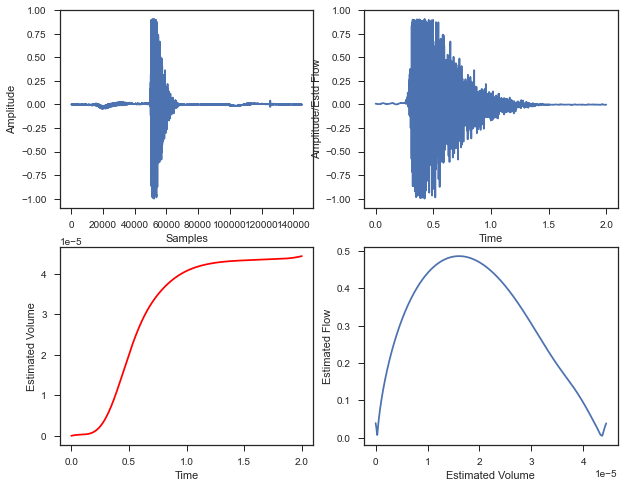

Reading: 014_FVC_Cloth_2.json
SNR= -0.0008704888818786183
Raw PEF =  12.912066376189491
Raw FEV1 =  4.110760809056576
Raw FVC =  4.407994088549228
Ratio% =  93.25694922629812





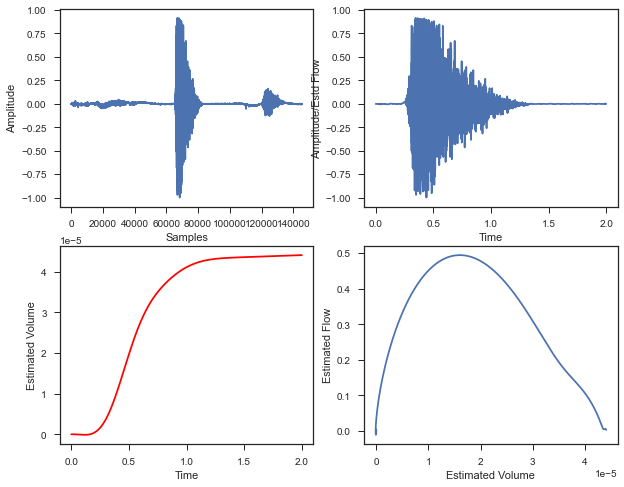

Reading: 015_FVC_Cloth_1.json
SNR= 0.03983855388317944
Raw PEF =  13.221471405647566
Raw FEV1 =  3.5929697352625807
Raw FVC =  4.183052397857737
Ratio% =  85.89349100916462





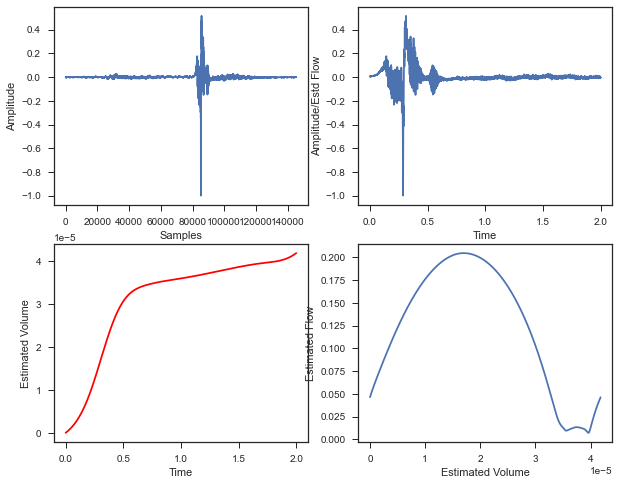

Reading: 016_FVC_Cloth_1.json
SNR= 0.10422409300048224
Raw PEF =  8.191715961558382
Raw FEV1 =  3.9353035104800727
Raw FVC =  4.907552213787091
Ratio% =  80.18872421620661





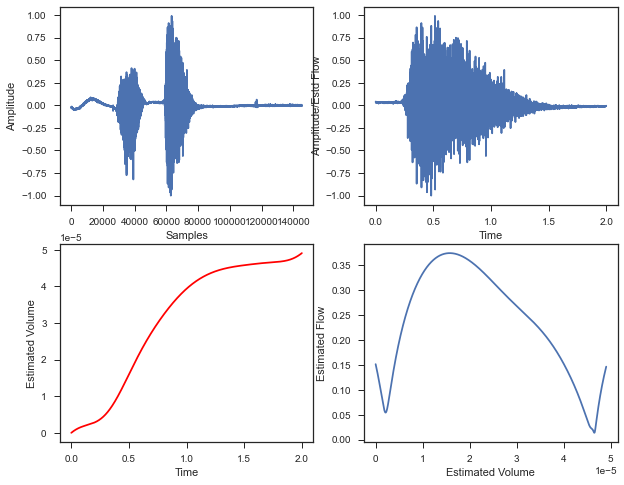

Reading: 016_FVC_Cloth_2.json
SNR= -0.043744614742620126
Raw PEF =  7.522032674098468
Raw FEV1 =  3.925896340665521
Raw FVC =  5.066489938881057
Ratio% =  77.48749899881498





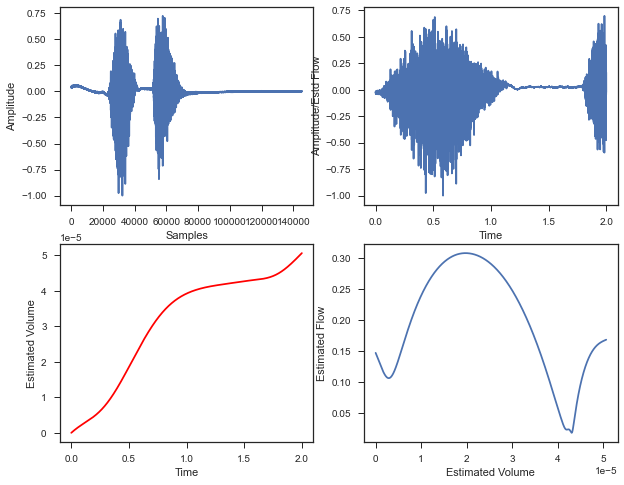

Reading: 017_FVC_Cloth_1.json
SNR= 0.0019563772570753766
Raw PEF =  13.363472584184175
Raw FEV1 =  3.9541066146572694
Raw FVC =  4.453258057861364
Ratio% =  88.79132004661308





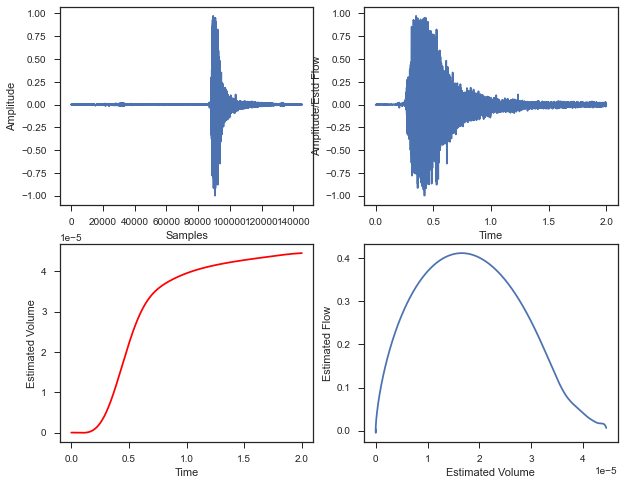

Reading: 017_FVC_Cloth_2.json
SNR= 0.0010951189592023442
Raw PEF =  12.802481367283486
Raw FEV1 =  3.968389809282551
Raw FVC =  4.532232160349471
Ratio% =  87.55927915609152





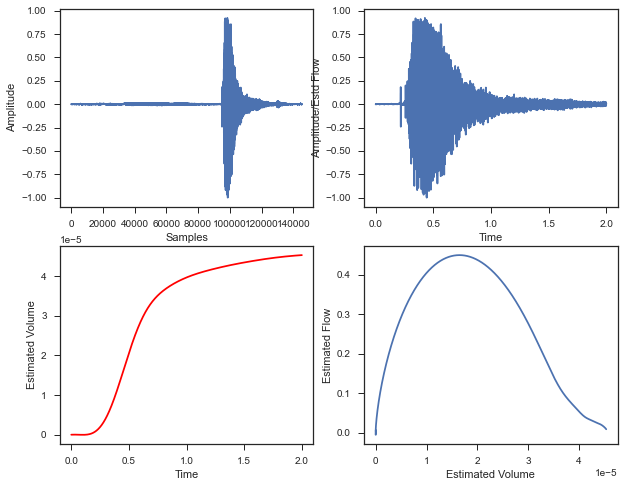

Reading: 018_FVC_Cloth_1.json
SNR= 0.009101386549308265
Raw PEF =  6.390474328638182
Raw FEV1 =  4.168235374011369
Raw FVC =  6.624151683206424
Ratio% =  62.92481774804003





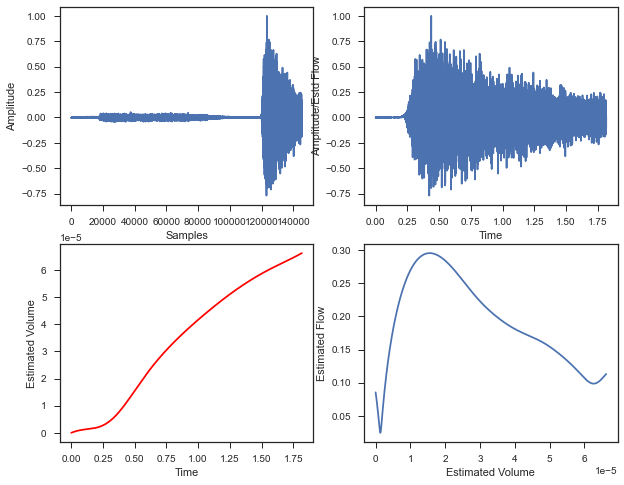

Reading: 018_FVC_Cloth_2.json
SNR= 0.018344137686507375
Raw PEF =  5.727647495753747
Raw FEV1 =  3.2983143378801763
Raw FVC =  6.282936584768918
Ratio% =  52.49638116475571





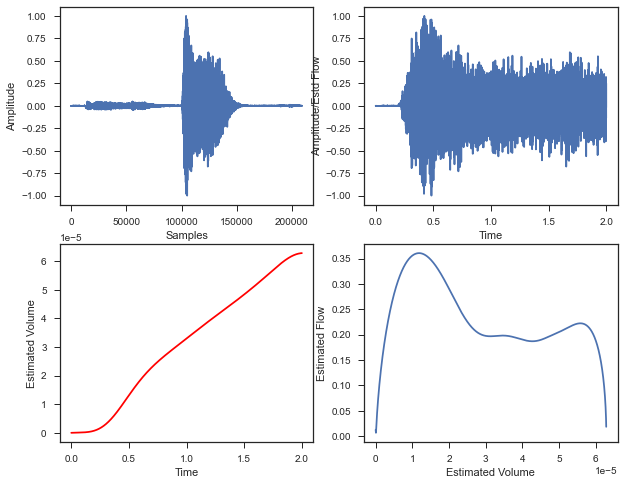

Reading: 019_FVC_Cloth_1.json
SNR= 0.007130223934034602
Raw PEF =  10.380683287708708
Raw FEV1 =  4.174936622094281
Raw FVC =  4.584457511931745
Ratio% =  91.06718976516579





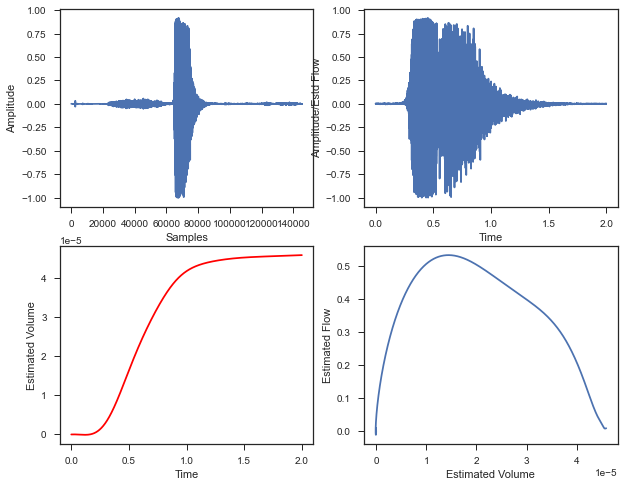

Reading: 020_FVC_Cloth_1.json
SNR= 0.0020632485889347366
Raw PEF =  10.361559868450122
Raw FEV1 =  4.174726863822747
Raw FVC =  4.420950455872555
Ratio% =  94.43052812947185





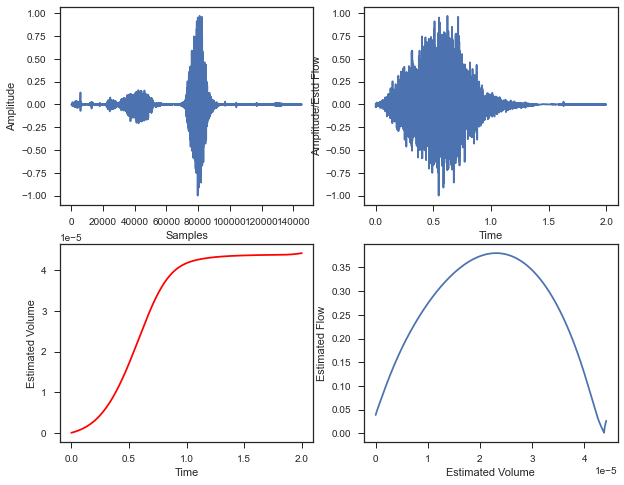

Reading: 020_FVC_Cloth_2.json
SNR= 0.004945023319917382
Raw PEF =  11.30773392786625
Raw FEV1 =  4.176706675427894
Raw FVC =  4.488639913952814
Ratio% =  93.05060676497386





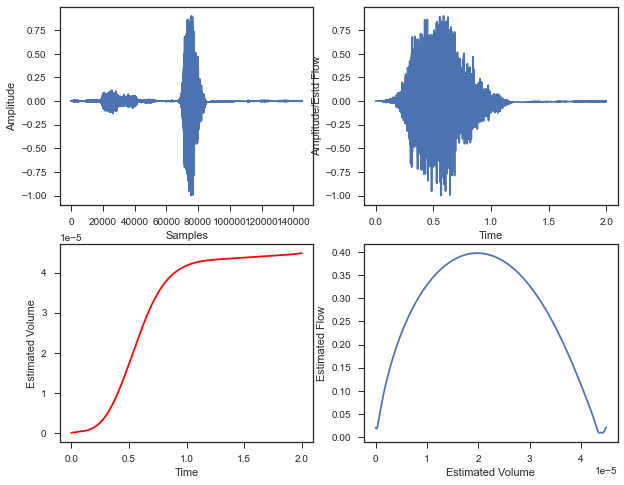

Reading: Akshat_21_cloth_1.json
SNR= 0.0006766108939148251
Raw PEF =  12.97334963725479
Raw FEV1 =  4.067821394295593
Raw FVC =  4.536248371466422
Ratio% =  89.67369202891769





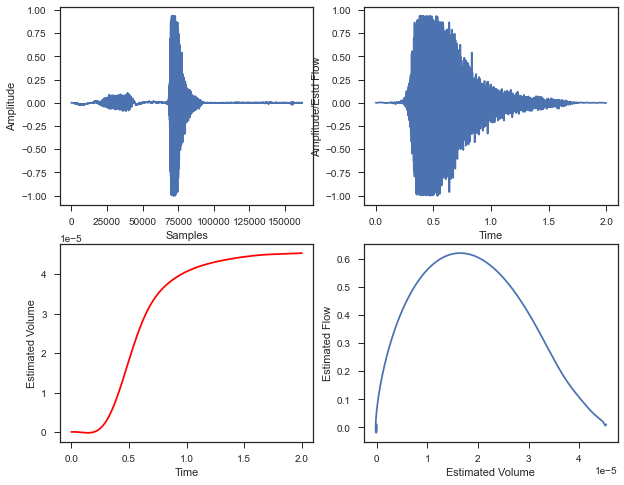

Reading: Akshat_21_cloth_2.json
SNR= 0.005308618294785788
Raw PEF =  12.575683243073689
Raw FEV1 =  4.085089657057788
Raw FVC =  4.483984007476063
Ratio% =  91.10401933295913





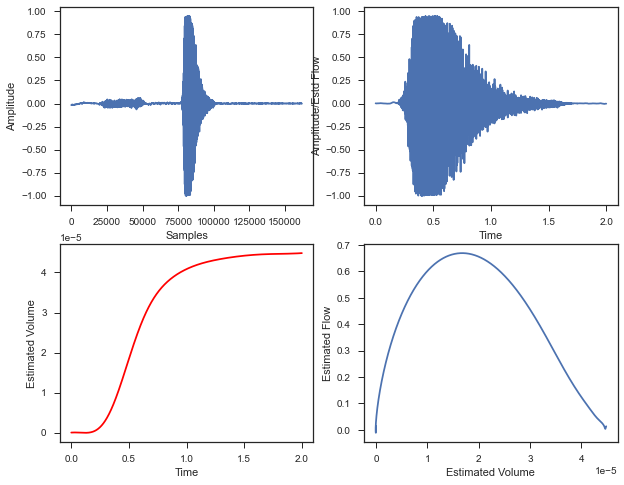

Reading: Anubhav_FVC_Cloth_1.json
SNR= 0.014660658388907007
Raw PEF =  5.335474776895999
Raw FEV1 =  3.109527552156942
Raw FVC =  6.209764288687775
Ratio% =  50.074808118264926





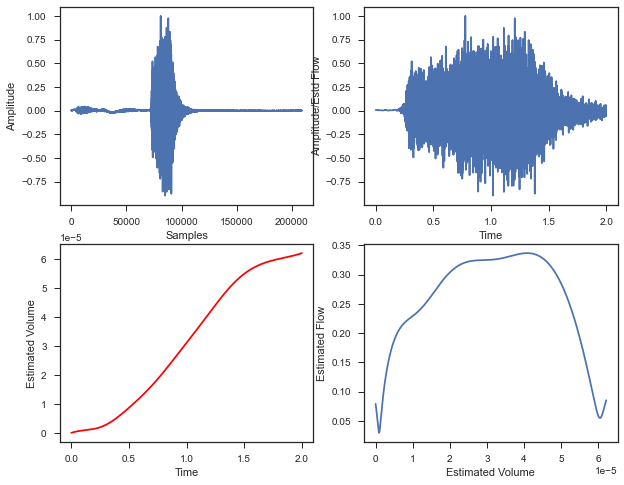

Reading: Anubhav_FVC_Cloth_2.json
SNR= 0.0309052916430349
Raw PEF =  7.010032629196518
Raw FEV1 =  3.90751667965671
Raw FVC =  5.134495378521817
Ratio% =  76.10322712534324





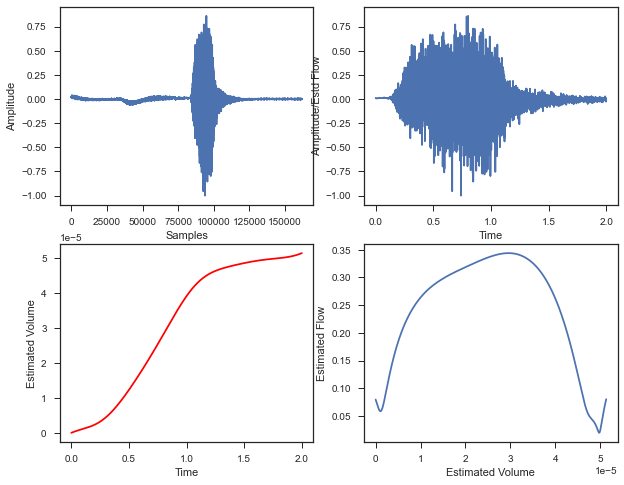

Reading: Aslam_22_cloth_1.json
SNR= 0.04716629362165974
Raw PEF =  5.669539982478064
Raw FEV1 =  3.534011164754431
Raw FVC =  5.548351608349873
Ratio% =  63.69479467443983





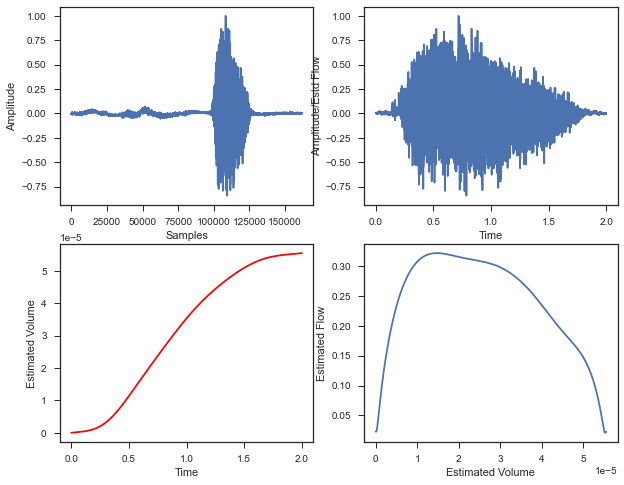

Reading: Aslam_22_cloth_2.json
SNR= 0.013323416501737134
Raw PEF =  6.959152256845997
Raw FEV1 =  3.7022549872063557
Raw FVC =  5.191406505702285
Ratio% =  71.31506621837006





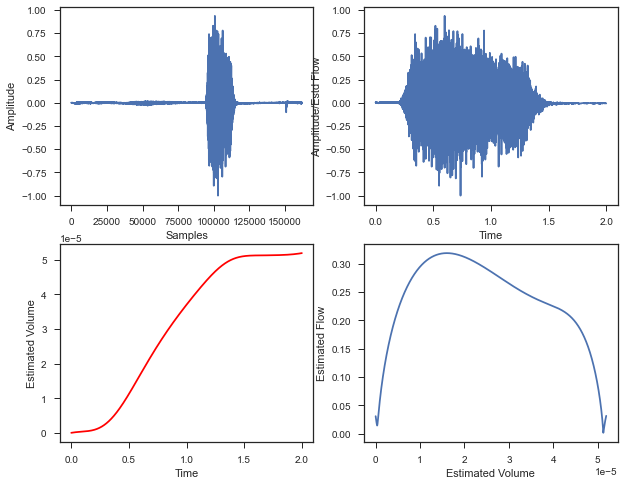

Reading: Raviraj_FVC_Cloth_1.json
SNR= 0.011441547913425115
Raw PEF =  9.44876659334215
Raw FEV1 =  3.85820919703297
Raw FVC =  4.979384929675611
Ratio% =  77.48365011990182





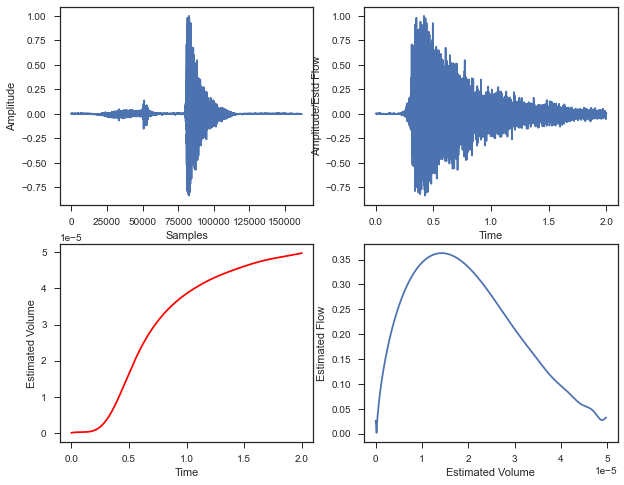

Reading: Raviraj_FVC_Cloth_2.json
SNR= 0.00780796298917892
Raw PEF =  8.80019726485538
Raw FEV1 =  3.8800471009163524
Raw FVC =  4.9798226984762
Ratio% =  77.91536638651064





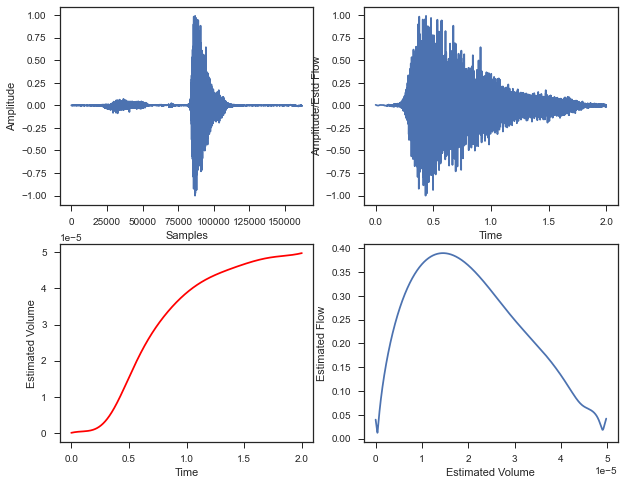

Reading: Rishiraj_FVC_ClothMask_1.json
SNR= 0.022156766806625604
Raw PEF =  7.123735871740746
Raw FEV1 =  3.472319967757019
Raw FVC =  5.37081396968115
Ratio% =  64.65165219571291





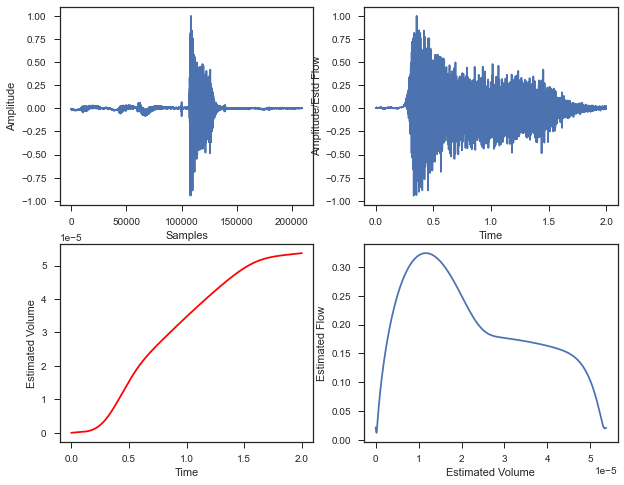

Reading: Rishiraj_FVC_ClothMask_2.json
SNR= 0.01901229334526201
Raw PEF =  6.640598504965175
Raw FEV1 =  3.471338828973187
Raw FVC =  5.532292040906174
Ratio% =  62.74684711699694





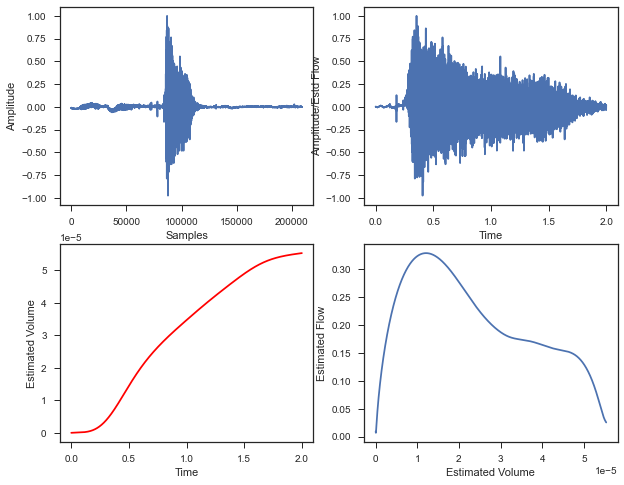

Reading: Rohit_FVC_ClothMask_1.json
SNR= 0.011198976674451381
Raw PEF =  7.115197204279658
Raw FEV1 =  3.7006998698860785
Raw FVC =  5.060237036753491
Ratio% =  73.13293513736949





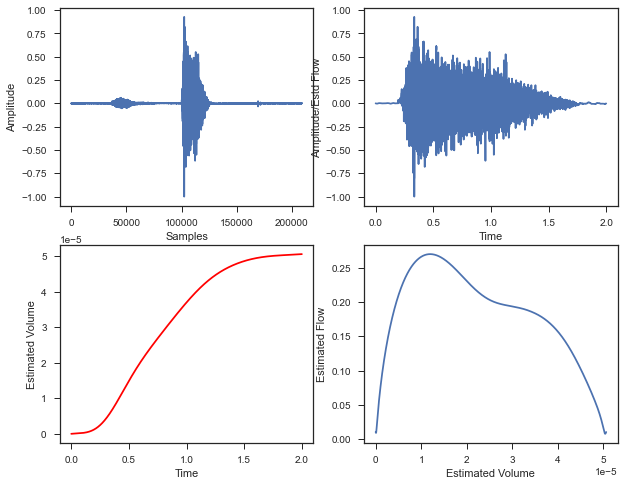

Reading: Rohit_FVC_ClothMask_2.json
SNR= 0.009612308172690192
Raw PEF =  6.623033477870497
Raw FEV1 =  3.754184148566688
Raw FVC =  5.220300244147837
Ratio% =  71.91510014726215





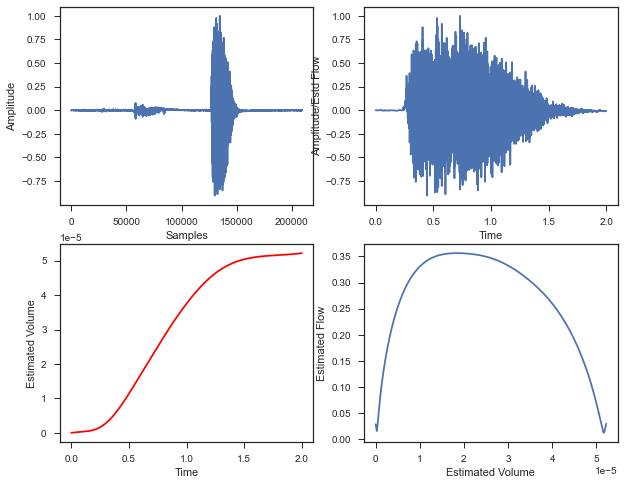

"\n#save the data\nrPFT = pd.DataFrame(\n    {'Filename': fileList,\n     'rPEF': rPEF,\n     'rFEV1': rFEV1,\n     'rFVC': rFVC\n    })\n"

In [10]:
polynomialCoef = []

rPEF = []
rFEV1 = []
rFVC = []
fileList = []

for file in filenames:
    fs = 16000
    print("Reading:", file)
    fileList.append(file)
    fig = plt.subplots(figsize=(10,8))
    x = pd.read_json(mypath+file, orient='keys')['payload']['values']
    x = x/np.max(np.abs(x))
    plt.subplot(2, 2, 1)
    plt.plot(x)
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    
    #sampling rate is 16Khz
    
    
    #detect the starting point of FVC
    fvcStartIndex = np.where(x>=0.50)
    #move back x second from the point FVC started and go till y seconds
    x = x[fvcStartIndex[0][0]-5000:fvcStartIndex[0][0]-5000+32000]
    print("SNR=", x.mean()/x.std())
    t = np.arange(0,len(x))/fs
    
    plt.subplot(2, 2, 2)
    plt.plot(t,x)
    plt.ylabel('Amplitude/Estd Flow')
    plt.xlabel('Time')
    

    # get analytic signal
    ax = signal.hilbert(x)
    envelope_hat = np.abs(ax)
    #filter the Hilbert envelope
    nyq_rate = fs /0.5
    width = 1.0/nyq_rate # 5 Hz filter transition width.
    ripple_db = 10.0 # stop band attenuation
    fL_hz = 10
    N, beta = signal.kaiserord(ripple_db, width)
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

    envelope_hat_filt_normalized = envelope_hat_filt/np.sum(envelope_hat_filt)
    
    #Corresponds to PEF
    rPEF.append(100000*envelope_hat_filt_normalized.max())
    print("Raw PEF = ",100000*envelope_hat_filt_normalized.max())
    
    #take cumsum of flow and then normalize
    estdVolume = np.cumsum(envelope_hat_filt)
    estdVolume = estdVolume/np.sum(estdVolume)
    
    #FEV1 Estimate
    rFEV1.append(100000*estdVolume[np.where(t==1)[0][0]])
    print("Raw FEV1 = ",100000*estdVolume[np.where(t==1)[0][0]])
    
    plt.subplot(2, 2, 3)
    plt.plot(t,estdVolume,color='red',label='Estimated Volume')
    plt.ylabel('Estimated Volume')
    plt.xlabel('Time')
    pd.DataFrame({'Volume':estdVolume, 'time':t}).to_csv('approx-volume-time-data/clothMask/'+file+'.csv')
    
    #FVC Estimate
    rFVC.append(100000*estdVolume[-1])
    print("Raw FVC = ",100000*estdVolume[-1])
    print("Ratio% = ", (100000*estdVolume[np.where(t==1)[0][0]])/(100000*estdVolume[-1])*100)
    print("\n\n")
    
    
    plt.subplot(2, 2, 4)
    plt.plot(estdVolume, envelope_hat_filt)
    plt.xlabel('Estimated Volume')
    plt.ylabel('Estimated Flow')
    pd.DataFrame({'Volume':estdVolume, 'Flow':envelope_hat_filt}).to_csv('approx-flow-volume-data/clothMask/'+file+'.csv')
    
    
    plt.show()
    
'''
#save the data
rPFT = pd.DataFrame(
    {'Filename': fileList,
     'rPEF': rPEF,
     'rFEV1': rFEV1,
     'rFVC': rFVC
    })
'''

In [23]:
file

'005_FVC_Cloth_1.json'

In [87]:
fs*3

132300

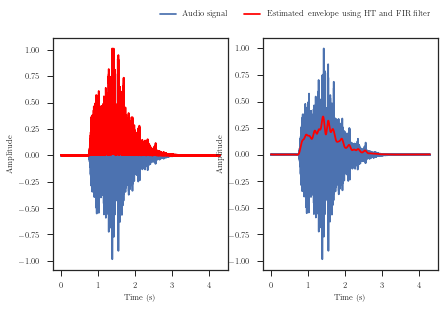

In [92]:
figname = 'audio-envelope'
lt.latexify(columns=2)
[fs, x] = wavfile.read("audioData/FVC-1.wav")
x = x/np.max(np.abs(x))
x = x[132300:]
t = np.arange(0,len(x))/fs
# get analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
#filter the Hilbert envelope
nyq_rate = fs / 2.0
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

#lt.format_axes(ax)

ax = plt.subplot(1,2,1)
ax.plot(t,x,label='Audio signal')
ax.plot(t,envelope_hat,color='red',label='Estimated envelope using HT')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
#ax.legend(loc='upper right',frameon=False,fontsize=12)

ax = plt.subplot(1,2,2)
ax.plot(t,x,label='Audio signal')
ax.plot(t,envelope_hat_filt,color='red',label='Estimated envelope using HT and FIR filter')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False, ncol=2, bbox_to_anchor=[1.,1.15])

#lt.format_axes(ax)

#plt.savefig(figname+'.pdf', bbox_inches='tight')

# plt.xlim(0,0.5)
#plt.ylim(-1,1.5)
plt.show()

In [35]:
#Corresponds to PEF
envelope_hat_filt.max()

0.4487636776600239

In [36]:
#take cumsum of flow and then normalize
estdVolume = np.cumsum(envelope_hat_filt)
estdVolume = estdVolume/np.sum(estdVolume)

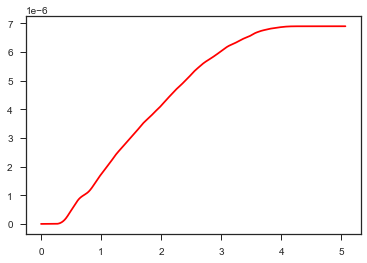

In [37]:
plt.plot(t,estdVolume,color='red',label='Estimated Volume')

In [38]:
#FEV1 Estimate
estdVolume[np.where(t==1)[0][0]]

1.731395981916569e-06

In [46]:
#FVC Estimate
estdVolume[-1]

6.9036928228316145e-06

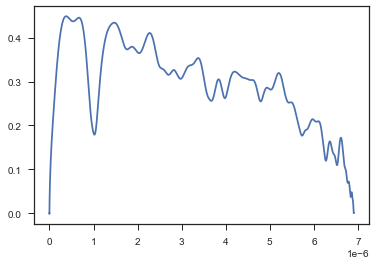

In [40]:
#estimated flow volume curve | Both y-axis and x-axis are normalized between 0 and 1
len(estdVolume) == len(envelope_hat_filt)
plt.plot(estdVolume, envelope_hat_filt)

In [12]:
import latexify as lt

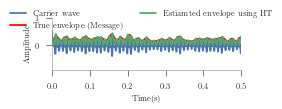

In [51]:
# envelope with no kaiser window
figname="am-carrier"
lt.latexify()
fs = 8e3
dur = 5 # signal duration
num_samples = int(dur*fs)
t = np.arange(0,num_samples,1)/fs
nyq_rate = fs / 2.0
width = 5.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 60.0 # stop band attenuation
N, beta = signal.kaiserord(ripple_db, width)
# create envelope
fL_hz = 50
envelope = create_envelope(num_samples=num_samples,fL_hz=fL_hz,N=N,beta=beta) 
# create carrier
carrier = create_carrier_harmonic(fs=fs,fc=100,num_samples=num_samples,ncomps=2)
# create am-fm signal
x = np.multiply(envelope,carrier)
# estimate analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
# plt.plot(x)
#fig = plt.subplots(figsize=(16,8))
ax = plt.subplot(2,1,1)
ax.plot(t,x,label='Carrier wave')
ax.plot(t,envelope,color='red', label='True envelope (Message)')
ax.plot(t,envelope_hat,label='Estiamted envelope using HT')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False, ncol=2, bbox_to_anchor=[1.2,1.3])
#ax.legend(bbox_to_anchor=[0.43,1.],ncol=3)
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)
#ax.grid(True)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.xlim(0,0.5)
plt.ylim(-.9,1.)
lt.format_axes(ax)
plt.savefig(figname+'.pdf', bbox_inches='tight')
plt.show()

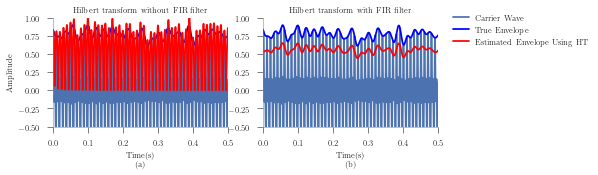

In [139]:
figname="am-carrier"
lt.latexify(columns=2, fig_height=2)
fs = 8e3
dur = 5 # signal duration
num_samples = int(dur*fs)
t = np.arange(0,num_samples,1)/fs
nyq_rate = fs / 2.0
width = 5.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 60.0 # stop band attenuation
N, beta = signal.kaiserord(ripple_db, width)
# create envelope
fL_hz = 50
envelope = create_envelope(num_samples=num_samples,fL_hz=fL_hz,N=N,beta=beta) 
# create carrier
carrier = create_carrier_harmonic(fs=fs,fc=100,num_samples=num_samples,ncomps=2)
# create am-fm signal
x = np.multiply(envelope,carrier)
# estimate analytic signal
ax = signal.hilbert(x)
envelope_hat = np.abs(ax)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)

#fig = plt.subplots(figsize=(16,4))
ax = plt.subplot(1,2,1)
ax.plot(t,x,label='Carrier Wave')
ax.plot(t,envelope,color='blue',label='True Envelope')
ax.plot(t,envelope_hat,color='red',label='Estimated Envelope Using HT')
ax.set_title('Hilbert transform without FIR filter')
ax.set_xlabel('Time(s)\n (a)')
ax.set_ylabel('Amplitude')
#ax.legend(loc='upper right',frameon=False,fontsize=12)

ax.spines['top'].set_visible(False)
plt.xlim(0,0.5)
plt.ylim(-.5,1)

lt.format_axes(ax)

ax = plt.subplot(1,2,2)
ax.plot(t,x,label='Carrier Wave')
ax.plot(t,envelope,color='blue',label='True Envelope')
ax.plot(t,envelope_hat_filt,color='red',label='Estimated Envelope Using HT')
ax.set_title('Hilbert transform with FIR filter')
ax.set_xlabel('Time(s)\n (b)')
#ax.set_ylabel('Amplitude')
ax.legend(loc='upper right',frameon=False, ncol=1, bbox_to_anchor=[1.9,1.1])
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)


plt.xlim(0,0.5)
plt.ylim(-.5,1)

lt.format_axes(ax)

plt.savefig(figname+'.pdf', bbox_inches='tight')

plt.show()

In [137]:
def create_envelope(num_samples,fL_hz=100,N=1000,beta=3):
    # we will create the envelope by low pass filtering white noise
    mean = 0
    std = 1
    taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
    x = np.random.normal(mean, std, size=num_samples)
    x = signal.filtfilt(taps, 1,x)
    x = (x-np.min(x))
    x = x/np.max(x)
    return x
def create_carrier_harmonic(fs=8e3,fc=200,num_samples=1000,ncomps=1):
    # this will create a harmonic carrier with ncomps harmonics
    x = []
    for i in range(ncomps):
        x.append(np.sin(2*np.pi*(i+1)*fc*np.arange(0,num_samples,1)/fs))
    x = sum(x)
    x = x/np.max(np.abs(x))
    return x
def create_carrier_noise(mean=0,std=1,num_samples=1000):
    # this will create a white noise carrier
    x = np.random.normal(mean, std, size=num_samples)
    x = x/np.abs(x)
    return x